In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
pd.set_option('future.no_silent_downcasting', True)

In [49]:
df = pd.read_csv('SAP-4000.csv')

In [50]:
df.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


In [52]:
df.describe(include=np.number)

,HoursStudied/Week,Attendance(%),Exam_Score
count,4000.000000,4000.000000,4000.000000
mean,9.861025,75.224150,71.107775
std,3.713801,14.496906,16.748950
min,0.000000,50.000000,16.600000
25%,7.400000,62.600000,59.300000
50%,9.900000,75.600000,71.550000
75%,12.600000,87.700000,83.500000
max,16.000000,100.000000,100.000000


In [53]:
df.describe(include=object)

,Gender,Tutoring,Region,Parent Education
count,4000,4000,4000,3578
unique,2,2,2,3
top,Female,No,Urban,Secondary
freq,2040,2767,2423,1590


In [54]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [55]:
df['Tutoring'].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
df['Region'].unique()

array(['Urban', 'Rural'], dtype=object)

In [57]:
(df['Parent Education'].unique()[3])

nan

In [58]:
df['Gender'].replace(['Male','Female'],[0,1],inplace=True)
df['Tutoring'].replace(['No','Yes'],[0,1],inplace=True)
df['Region'].replace(['Urban', 'Rural'],[0,1],inplace=True)
df['Parent Education'].replace(['Tertiary', 'Primary', 'Secondary','nan'],[2,0,1,np.nan],inplace=True)

In [59]:
df

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,0,5.5,0,0,72.7,2,43.5
1,1,6.8,0,0,62.0,0,51.7
2,1,9.7,0,1,95.0,1,70.1
3,0,13.3,1,1,52.9,NaN,79.5
4,1,8.9,0,0,50.8,NaN,52.2
...,...,...,...,...,...,...,...
3995,0,11.3,1,0,79.5,1,93.5
3996,0,3.7,1,0,50.7,2,53.8
3997,1,0.0,0,1,72.7,2,25.4
3998,0,4.0,0,0,62.2,2,40.3


<Axes: >

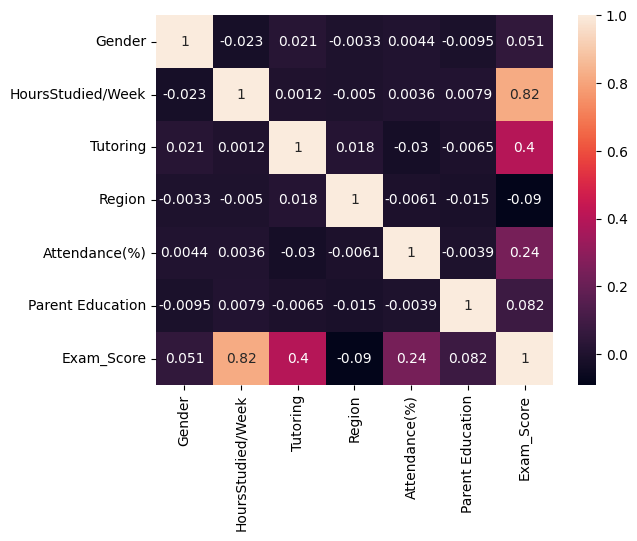

In [60]:
sns.heatmap(df.corr(),annot=True)

In [61]:
# Parent Education, Region and Gender feature not helping to estimate the Exam_Score

df.drop(['Gender','Parent Education','Region'],inplace=True,axis=1)
df

,HoursStudied/Week,Tutoring,Attendance(%),Exam_Score
0,5.5,0,72.7,43.5
1,6.8,0,62.0,51.7
2,9.7,0,95.0,70.1
3,13.3,1,52.9,79.5
4,8.9,0,50.8,52.2
...,...,...,...,...
3995,11.3,1,79.5,93.5
3996,3.7,1,50.7,53.8
3997,0.0,0,72.7,25.4
3998,4.0,0,62.2,40.3


In [86]:
df.duplicated().value_counts()

False    3996
True        4
Name: count, dtype: int64

In [87]:
df.drop_duplicates(inplace=True)

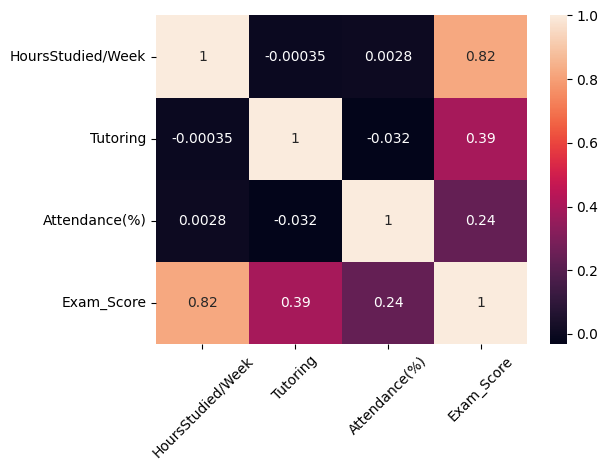

In [88]:
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='Attendance(%)', ylabel='Density'>

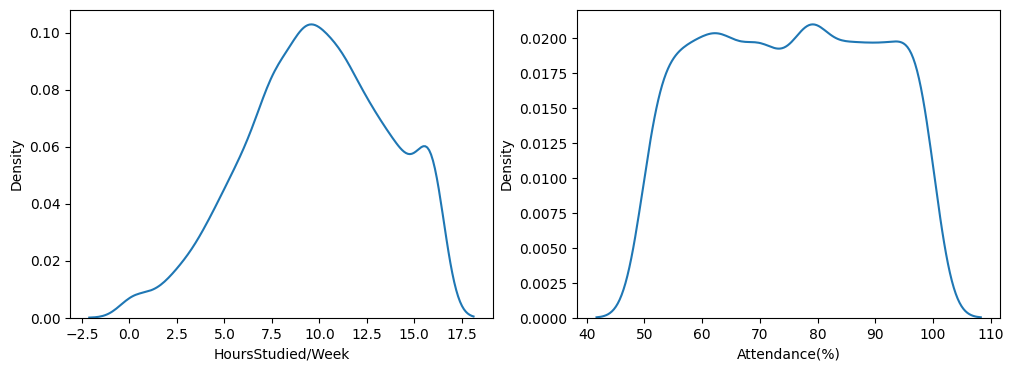

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.flatten()
sns.kdeplot(df['HoursStudied/Week'],ax=axes[0])
sns.kdeplot(df['Attendance(%)'],ax=axes[1])

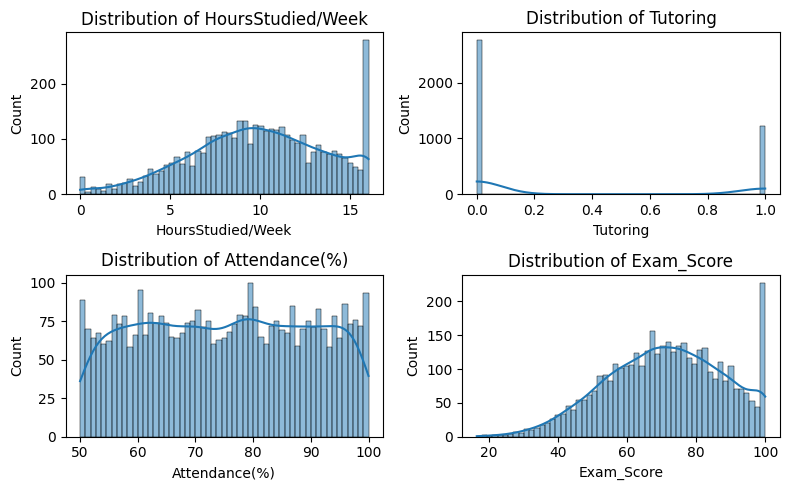

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

numeric_cols = df.columns

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], kde=True, ax=ax,bins=55)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [92]:
X = df.drop('Exam_Score',axis=1)
y = df['Exam_Score']

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [99]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

<Axes: xlabel='Attendance(%)', ylabel='Density'>

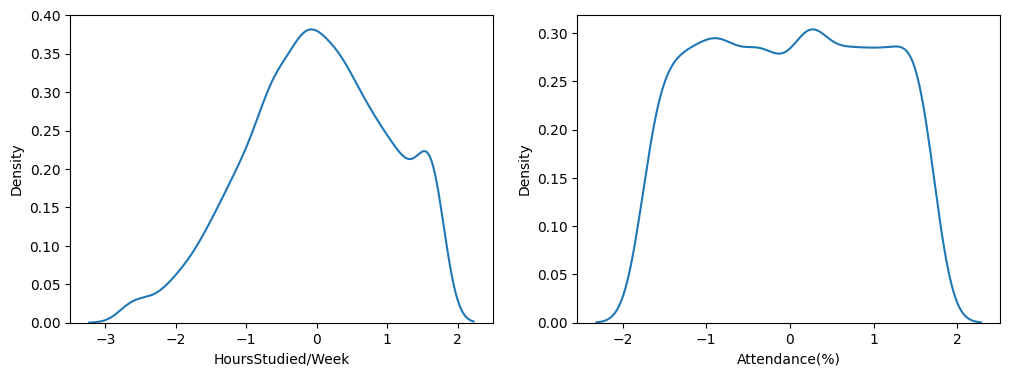

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.flatten()
sns.kdeplot(X_scaled['HoursStudied/Week'],ax=axes[0])
sns.kdeplot(X_scaled['Attendance(%)'],ax=axes[1])

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr = LinearRegression()
dtree = DecisionTreeRegressor(criterion='squared_error')

In [106]:
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [108]:
pred_lr = lr.predict(X_test)
pred_dtree = dtree.predict(X_test)

In [113]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('RMSE for LinearRegression is',mean_squared_error(y_test,pred_lr)**1/2)
print('RMSE for DecisionTreeRegressor is',mean_squared_error(y_test,pred_dtree)**1/2)

RMSE for LinearRegression is 14.937634417577
RMSE for DecisionTreeRegressor is 29.367042266868843


In [115]:
print('MAE for LinearRegression is',mean_absolute_error(y_test,pred_lr)**1/2)
print('MAE for DecisionTreeRegressor is',mean_absolute_error(y_test,pred_dtree)**1/2)

MAE for LinearRegression is 2.1827596667998153
MAE for DecisionTreeRegressor is 3.0061978771796816


In [116]:
train_pred_lr = lr.predict(X_train)
test_pred_lr = lr.predict(X_test)
print("Linear Regression R2 (Train):", r2_score(y_train, train_pred_lr))
print("Linear Regression R2 (Test):", r2_score(y_test, test_pred_lr))

# For Decision Tree Regressor
train_pred_dtree = dtree.predict(X_train)
test_pred_dtree = dtree.predict(X_test)
print("Decision Tree R2 (Train):", r2_score(y_train, train_pred_dtree))
print("Decision Tree R2 (Test):", r2_score(y_test, test_pred_dtree))

Linear Regression R2 (Train): 0.8839562118000295
Linear Regression R2 (Test): 0.8988080076865766
Decision Tree R2 (Train): 0.9978231380099999
Decision Tree R2 (Test): 0.8010588937803844


In [117]:
from sklearn.model_selection import KFold, cross_val_score

# For Linear Regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr_scores = cross_val_score(lr, X_scaled, y, cv=kf, scoring='r2')
print("Linear Regression R2 (K-Fold):", lr_scores)
print("Linear Regression R2 (K-Fold) Mean:", lr_scores.mean())

# For Decision Tree Regressor
dtree_scores = cross_val_score(dtree, X_scaled, y, cv=kf, scoring='r2')
print("Decision Tree R2 (K-Fold):", dtree_scores)
print("Decision Tree R2 (K-Fold) Mean:", dtree_scores.mean())

Linear Regression R2 (K-Fold): [0.89728497 0.90145188 0.87804827 0.88196962 0.8825413 ]
Linear Regression R2 (K-Fold) Mean: 0.8882592084441784
Decision Tree R2 (K-Fold): [0.7889039  0.80721681 0.77300592 0.76056507 0.77948962]
Decision Tree R2 (K-Fold) Mean: 0.7818362645426084


In [118]:
#the model's training and testing accuracy is not varying any further, we can say that this model is not overftting

In [119]:
from sklearn.model_selection import GridSearchCV

In [128]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 4,5]
}

dtree = DecisionTreeRegressor()

grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R2:", grid_search.best_score_)

best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validated R2: 0.864831165382156


In [124]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr = LinearRegression()

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R2:", grid_search.best_score_)

best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)

Best parameters: {'fit_intercept': True, 'positive': True}
Best cross-validated R2: 0.8832918752676354
